In [3]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [4]:
#cargar dataset
df = pd.read_csv("datasets/breast-cancer.csv")
#mostrar primeros datos
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Separar variables
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


In [6]:
#Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [7]:
#Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
#entrenamiento regresion logistica 
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [9]:
#Prediccion
y_pred = model.predict(X_test_scaled)


In [10]:
#evaluacion del modelo 
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy: 0.9790209790209791


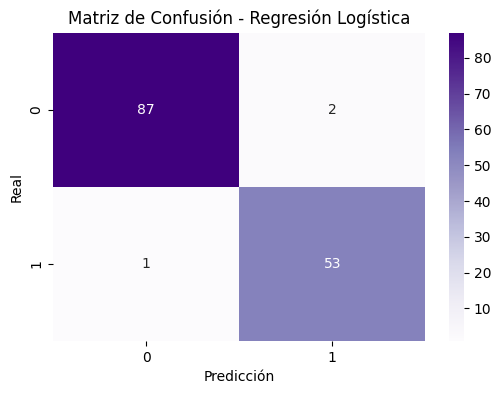

In [11]:
#matriz de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [12]:
#optimizacion del modelo 
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)


Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [13]:
#evaluacion del modelo analizado
y_pred_opt = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_opt))


              precision    recall  f1-score   support

           B       0.99      0.97      0.98        89
           M       0.95      0.98      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



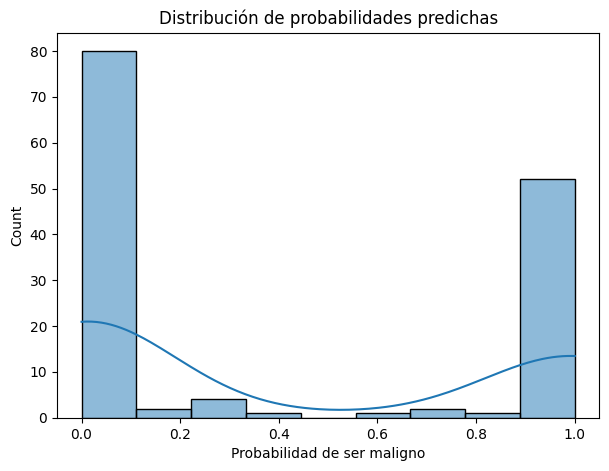

In [14]:
#Distribucion de probabilidades
y_prob = best_model.predict_proba(X_test_scaled)[:,1]

plt.figure(figsize=(7,5))
sns.histplot(y_prob, kde=True)
plt.title("Distribución de probabilidades predichas")
plt.xlabel("Probabilidad de ser maligno")
plt.show()
